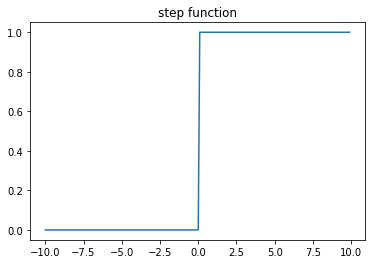

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stepfunc(x):
    return np.where(x <= 0, 0, 1)

x = np.arange(-10, 10, 0.1)
y = stepfunc(x)

plt.plot(x, y)
plt.title('step function')
plt.show()

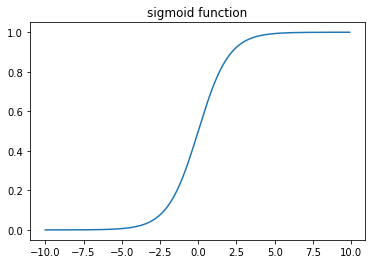

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

x = np.arange(-10, 10, 0.1)
y = sigmoid(x) 

plt.plot(x, y)
plt.title('sigmoid function')
plt.show()

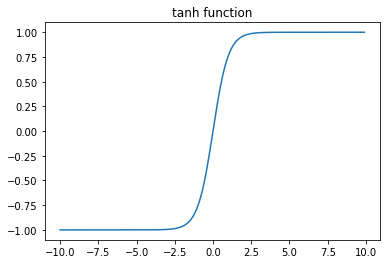

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  

x = np.arange(-10, 10, 0.1) 
y = tanh(x) 

plt.plot(x, y)
plt.title('tanh function')
plt.show()

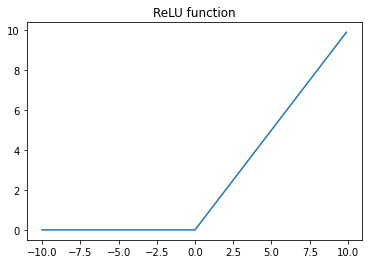

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10, 0.1)
y = relu(x)

plt.plot(x, y)
plt.title('ReLU function')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [ ]:
import numpy as np
X = np.array([10, 20])  
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([1, 2, 3])  

def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print('A1 :', A1)
print('Z1 :', Z1)

A1 : [ 6. 13. 20.]
Z1 : [0.99752738 0.99999774 1.        ]


In [ ]:
import numpy as np
X = np.array([10, 20])  # ①
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([1, 2, 3])  # ③

def sigmoid(x): 
    return 1 / (1 + np.exp(-x))

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Y = sigmoid(A2) 

print('A2 :', A2)
print('Y  :', Y)

A2 : [0.69975229 1.69900982]
Y  : [0.66813285 0.84540537]


In [ ]:
w

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0013452>

step|    w|    b| cost
----|-----|-----|-----
   1| 0.78| 0.72| 1.62


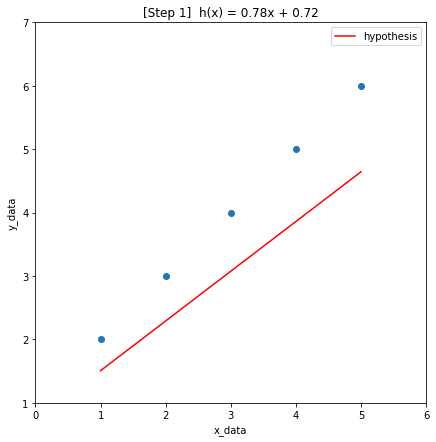

   3| 0.90| 0.76| 0.55


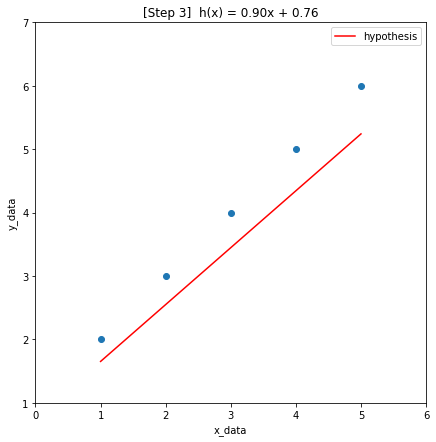

   5| 0.96| 0.78| 0.19


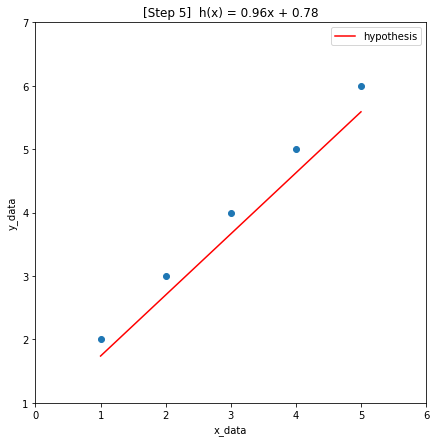

  10| 1.03| 0.80| 0.02


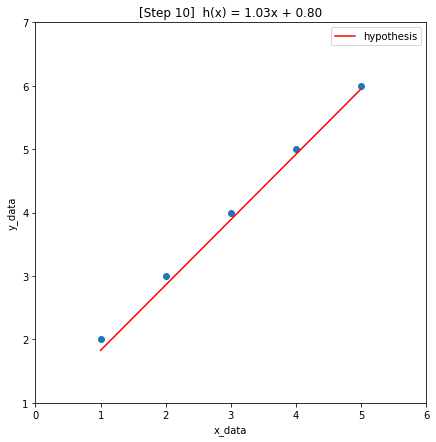

1000| 1.00| 0.99| 0.00


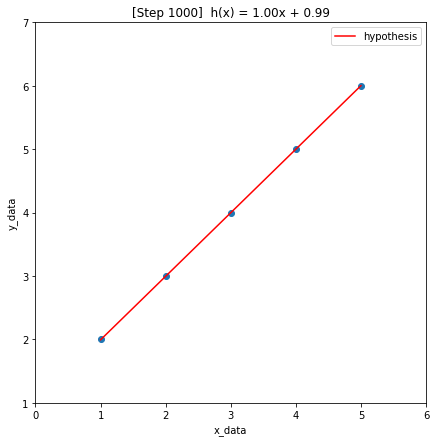

1100| 1.00| 1.00| 0.00


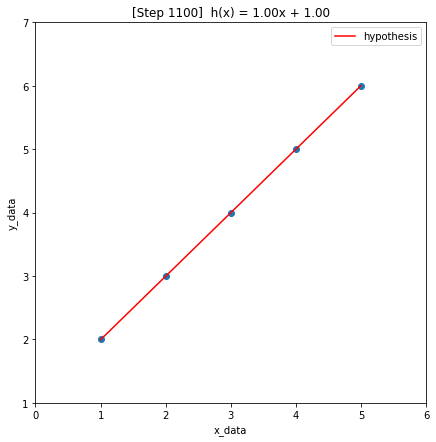

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf

x_data = [1, 2, 3, 4, 5]
y_data = [2, 3, 4, 5, 6]

w = tf.Variable(0.7)
b = tf.Variable(0.7)
learn_rate = 0.01

print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 1101): 
    with tf.GradientTape() as tape:
        hypothesis = w * x_data + b
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
    dw, db = tape.gradient(cost, [w, b])
    w.assign_sub(learn_rate * dw) # a = a - b
    b.assign_sub(learn_rate * db) 
    
    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")
        plt.figure(figsize=(7, 7))
        plt.title(f'[Step {i:d}]  h(x) = { w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o') 
        plt.plot(x_data, w * x_data + b, 'r', label='hypothesis') 
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0, 6)
        plt.ylim(1, 7)
        plt.legend(loc='best')
        plt.show()

# 주가딥러닝

In [ ]:
!pip install pykrx

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 256kB 9.6MB/s 


In [26]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
# ticker와 list로 코스피 기업목록 가져오기
    
def return_name(market):
    Market = []
 
    for ticker in market:
        Value =stock.get_market_ticker_name(ticker)
        Market.append([Value,ticker])
 
    df = pd.DataFrame(Market,columns=['회사명','상장번호'])
    return df

In [27]:
KOSPI = stock.get_market_ticker_list(market="KOSPI")
db1 = return_name(KOSPI)

In [29]:
df = stock.get_market_ohlcv_by_date("20160104", "2021054", "005930")
df.tail()   # 삼성주가 출력해보기
dfx=df[['시가','고가','저가','거래량','종가']]
dfx.tail(3)
data=dfx

In [30]:
#데이터정규화
data=dfx

import numpy as np
numer=data-np.min(data,0)  # 옵션값 0은 열단위에서 구하는 최소값, 1은 행단위에서 구하는 최소값 
numer+np.min(data,0)

,시가,고가,저가,거래량,종가
날짜,,,,,
2016-01-04,25200,25200,24100,306939,24100
2016-01-05,24040,24360,23720,216002,24160
2016-01-06,24160,24160,23360,366752,23500
2016-01-07,23320,23660,23020,282388,23260
2016-01-08,23260,23720,23260,257763,23420
...,...,...,...,...,...
2021-04-28,83200,83200,82100,15596759,82100
2021-04-29,82400,82500,81500,20000973,81700
2021-04-30,81900,82100,81500,18673197,81500


In [31]:
np.min(data,0)

시가         0
고가         0
저가         0
거래량        0
종가     22520
dtype: int32

In [32]:
deno=np.max(data,0)-np.min(data,0)
dfx1=numer/(deno+1e-7)          # 오류 cover위해 분모에 작은 수 추가
dfx1.head
dfx1

,시가,고가,저가,거래량,종가
날짜,,,,,
2016-01-04,0.279070,0.260331,0.269274,0.003399,0.023072
2016-01-05,0.266224,0.251653,0.265028,0.002392,0.023949
2016-01-06,0.267553,0.249587,0.261006,0.004061,0.014311
2016-01-07,0.258250,0.244421,0.257207,0.003127,0.010806
2016-01-08,0.257586,0.245041,0.259888,0.002854,0.013143
...,...,...,...,...,...
2021-04-28,0.921373,0.859504,0.917318,0.172710,0.870035
2021-04-29,0.912514,0.852273,0.910615,0.221480,0.864194
2021-04-30,0.906977,0.848140,0.910615,0.206777,0.861273


In [33]:
dfx1['종가']

날짜
2016-01-04    0.023072
2016-01-05    0.023949
2016-01-06    0.014311
2016-01-07    0.010806
2016-01-08    0.013143
                ...   
2021-04-28    0.870035
2021-04-29    0.864194
2021-04-30    0.861273
2021-05-03    0.864194
2021-05-04    0.877336
Name: 종가, Length: 1311, dtype: float64

In [34]:
dfy1=dfx1['종가']
x=dfx1.values.tolist()      # 텐서플로우작업은 모두 values로 변경해야함
y=dfy1.values.tolist()

In [35]:
dfx1.values[:,[1,2]][:10]

array([[0.26033058, 0.26927374],
       [0.25165289, 0.26502793],
       [0.24958678, 0.26100559],
       [0.24442149, 0.2572067 ],
       [0.24504132, 0.25988827],
       [0.24090909, 0.25608939],
       [0.24090909, 0.25564246],
       [0.23946281, 0.25653631],
       [0.23595041, 0.25273743],
       [0.23801653, 0.25117318]])

In [36]:
print(x[-1:]) 

[[0.9069767441850421, 0.8533057851230854, 0.9139664804459062, 0.13877843594242711, 0.8773364485968497]]


In [37]:
print(y[-1:])   # 종가자료만

[0.8773364485968497]


In [38]:
# 교재 438쪽

data_x=[]; data_y=[]
win_size=10

len(y) # 종가 개수

1311

In [39]:
# z_x=x[0:10]  #0일때는 0~10, 1일때는 1~11, 2일때는 2~12,  411일때는 411~421 이러면서 421번자료가 없죠
# i=1301

In [40]:
for i in range(len(y)-win_size):
  _x=x[i:i+win_size]  
  _y=y[i+win_size]
  data_x.append(_x) ; data_y.append(_y)

In [41]:
#훈련용 데이터 테스트데이터
train_size=int(len(data_y)*0.7)
trainX=np.array(data_x[0:train_size])
trainY=np.array(data_y[0:train_size])

test_size=int(len(data_y)-train_size)
testX=np.array(data_x[test_size:len(data_x)])
testY=np.array(data_y[test_size:len(data_y)])

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(win_size, 5)))   
# input_shape값의 10, 5는 10일간의 자료와 시가,고가,저가,거래량,종가의 5개자료
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=50, batch_size=30)
pred_y = model.predict(testX)

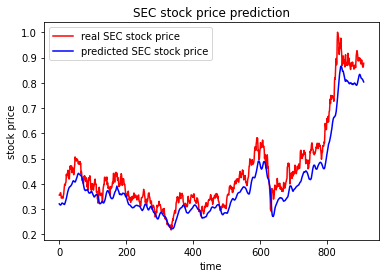

In [44]:
# Visualising the results
import matplotlib.pyplot as plt

plt.figure()
plt.plot(testY, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [54]:
print("Tomorrow's SEC price :", df['종가'].iloc[-1] * pred_y[-1] / dfx1.종가.iloc[-1], 'KRW')

Tomorrow's SEC price : [75650.99949803] KRW


In [51]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", df['종가'].iloc[-1] * pred_y[-1] / dfy1[-1:], 'KRW')

Tomorrow's SEC price : 날짜
2021-05-04    75650.999498
Name: 종가, dtype: float64 KRW


In [55]:
df['종가'].iloc[-1]

82600

In [50]:
dfy1[-1:]

날짜
2021-05-04    0.877336
Name: 종가, dtype: float64

# 교재코드
### 데이터 불러오기

In [ ]:
raw_df = stock.get_market_ohlcv_by_date("20180504", "20200122", "005930")
dfx=raw_df[['시가','고가','저가','거래량','종가']]
dfx.tail(3)
data=dfx


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
# from Investar import Analyzer


# raw_df = mk.get_daily_price('삼성전자', '2018-05-04', '2020-01-22')

window_size = 10 
data_size = 5

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

# dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615, 0.7755511022013004], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783, 0.8476953907781655], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292, 0.8837675350665981], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782, 0.9038076152268384], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332, 0.9038076152268384], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646, 0.8637274549063578], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187, 0.9318637274511749], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781, 0.9559118236434633], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812, 0.999999999995992], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453,

### 모델돌리기

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 10)            640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
10/10 [==============================] - 2s 8ms/step - loss: 0.1204
Epoch 2/60
10/10 [=====================

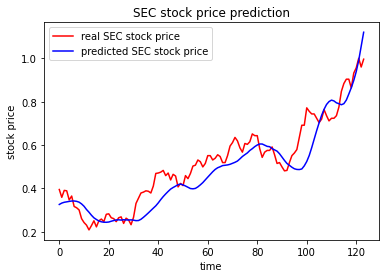

In [ ]:
# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()



In [ ]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:], 'KRW')

Tomorrow's SEC price :                       종가
날짜                      
2020-01-22  70079.598906 KRW


In [ ]:
raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:]

,종가
날짜,
2020-01-22,70079.598906


In [ ]:
pred_y

array([[0.35148796],
       [0.3618506 ],
       [0.36469325],
       [0.36316743],
       [0.36219242],
       [0.3633739 ],
       [0.35677966],
       [0.34573248],
       [0.3336979 ],
       [0.31688446],
       [0.2955874 ],
       [0.2716817 ],
       [0.2580897 ],
       [0.24210432],
       [0.23204279],
       [0.23401487],
       [0.24534985],
       [0.2511933 ],
       [0.26245645],
       [0.2651519 ],
       [0.273748  ],
       [0.2785    ],
       [0.2826184 ],
       [0.28130716],
       [0.2736514 ],
       [0.2624815 ],
       [0.25776443],
       [0.25634038],
       [0.2568527 ],
       [0.2690406 ],
       [0.26584548],
       [0.2654696 ],
       [0.2716131 ],
       [0.28475147],
       [0.3026002 ],
       [0.31982264],
       [0.32791078],
       [0.33633888],
       [0.34416676],
       [0.3543698 ],
       [0.36643076],
       [0.37983644],
       [0.39351526],
       [0.4043978 ],
       [0.4115083 ],
       [0.4188985 ],
       [0.420113  ],
       [0.417